<a href="https://colab.research.google.com/github/ernie-Griffiths/Determining-the-Validity-of-Genetically-Engineered-Crops-in-a-Warming-Climate-Using-Machine-Learning/blob/main/GradientBoostingRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import ensemble

from sklearn.metrics import mean_squared_error

In [ ]:
Phenotype_Soil_Weather_Data = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Finalised data/FeatureSelected_Phenotype_Soil_Weather_Data.csv",index_col=[0])

In [ ]:
Phenotype_Soil_Weather_Data['Texture'] = pd.factorize(Phenotype_Soil_Weather_Data['Texture'])[0] + 1
Phenotype_Soil_Weather_Data['Seed Success factor'] = Phenotype_Soil_Weather_Data['Seed Success factor'].round(decimals = 3)
Phenotype_Soil_Weather_Data = Phenotype_Soil_Weather_Data.dropna()
Phenotype_Soil_Weather_Data.head(2)

,Field-Location,Source,Pedigree,Family,Tester,Replicate,Block,Range,Pass,Anthesis [MM/DD/YY],...,Temperature [C],Dew Point [C],Relative Humidity [%],Solar Radiation [W/m2],Rainfall [mm],Wind Speed [m/s],Wind Direction [degrees],Wind Gust [m/s],Soil Temperature [C],Seed Success factor
0,DEH1,WIPV17/30359,PHN11_PHW65_0512/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,2.0,7/2/2019,...,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,1.525
1,DEH1,WIPV17/30278,PHN11_PHW65_0278/PHT69,PHN11_PHW65,PHT69,1.0,1,2.0,3.0,7/2/2019,...,23.041976,13.951074,72.528273,212.490939,0.012235,0.22562,141.449484,6.775455,23.81826,2.057


In [ ]:
xdata = Phenotype_Soil_Weather_Data.drop(["Seed Success factor","Field-Location",	"Source","Pedigree",	"Family",	"Tester",	"Replicate",	"Block","Anthesis [MM/DD/YY]","Silking [MM/DD/YY]","Location"], axis = 1)
ydata = Phenotype_Soil_Weather_Data["Seed Success factor"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.4,shuffle = True, random_state = 42)

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0890


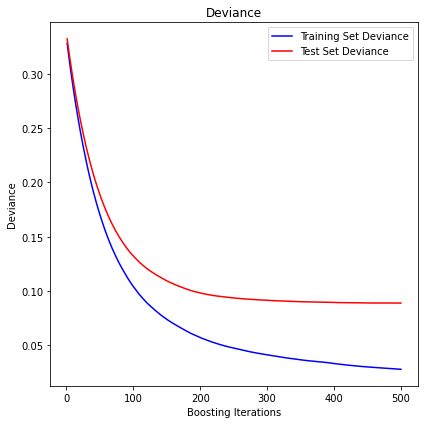

Accuracy score
0.7359660242441399
Error Bracket
0.29824950707825537


In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()
acc_score = r2_score(y_test, y_pred)
Mean_Error = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy score")
print(acc_score)
print("Error Bracket")
print(Mean_Error)

In [ ]:
GSparams = {
    "n_estimators": [700,800,900,1000],
    "max_depth": range(6,8),
    "min_samples_split": range(6,8),
    "learning_rate": [0.01],
    "loss": ["squared_error"],
}
model = GridSearchCV(reg, GSparams, cv=5)
model.fit(x_train,y_train)
selectedParams = model.best_params_
selectedParams

KeyboardInterrupt: ignored

In [ ]:
selectedParams = {'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 6,
 'min_samples_split': 7,
 'n_estimators': 1000}

In [ ]:
reg = ensemble.GradientBoostingRegressor(**selectedParams)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0871


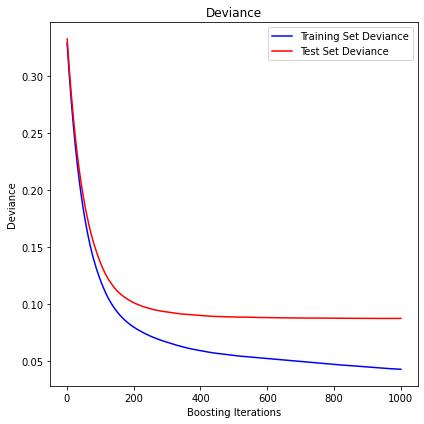

Accuracy score
0.7413364035896003
Error Bracket
0.2952007678251567


In [ ]:
test_score = np.zeros((selectedParams["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(selectedParams["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(selectedParams["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()
acc_score = r2_score(y_test, y_pred)
Mean_Error = mean_squared_error(y_test, y_pred, squared=False)
print("Accuracy score")
print(acc_score)
print("Error Bracket")
print(Mean_Error)

Results = pd.read_csv("/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results /LAResults.csv",index_col=[0])

dict = {'Learning Algorithum': 'Gradient Boosting Regressor', 'R2 Score': acc_score, 'Error Bracket': Mean_Error}

Results = Results.append(dict, ignore_index = True)


In [ ]:
Results

,Learning Algorithum,R2 Score,Error Bracket
0,Regression Tree,0.671146,0.332852
1,Random Forest,0.720002,0.303280
2,KNN Regression,0.693163,0.318367
3,Gradient Boosting Regressor,0.741307,0.295217
4,Convolutional Nerual Network,0.696746,0.319638
5,MLP Regressor,0.723194,0.305378
6,Radial Basis Function NN,0.722957,0.528065
7,Random Forest,0.720002,0.303280
8,Gradient Boosting Regressor,0.741336,0.295201


In [ ]:
#Results.to_csv('LAResults.csv')
#!cp LAResults.csv "/content/drive/MyDrive/University of reading/MSC FINAL project/Data/Data Files/Results "

In [ ]:
reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=7,
                          n_estimators=1000)

In [ ]:
import pickle
filename = 'GBR_model.sav'
pickle.dump(reg, open(filename, 'wb'))